In [1]:
%matplotlib inline

In [2]:
import h5py
import numpy as np
onehot_train = np.array(h5py.File("ctcf_data/train_data.hdf5")['X']['sequence'][:,300:700,:])
onehot_test = np.array(h5py.File("ctcf_data/valid_data.hdf5")['X']['sequence'][:,300:700,:])
print(onehot_train.shape)
print(onehot_test.shape)
labels_train = np.array(h5py.File("ctcf_data/train_data.hdf5")['Y']['output'][:,0], dtype=int)
labels_test = np.array(h5py.File("ctcf_data/valid_data.hdf5")['Y']['output'][:,0], dtype=int)
print(labels_train.shape)
print(labels_test.shape)

(17790, 400, 4)
(14240, 400, 4)
(17790,)
(14240,)


In [3]:
positive_test_label_indices = np.nonzero(labels_test == 1)[0]
print("Positive test label indices", positive_test_label_indices)
print("Positive test label indices shape ", positive_test_label_indices.shape)

('Positive test label indices', array([    1,     5,    15, ..., 14216, 14220, 14234]))
('Positive test label indices shape ', (2093,))


In [4]:
onehot_data = onehot_test[positive_test_label_indices]
print("One hot data shape: ", onehot_data.shape)

('One hot data shape: ', (2093, 400, 4))


In [5]:
scores = np.load("ctcf_data/ctcf_importancescores_chr1.npy")
print("Scores shape: ", scores.shape)

('Scores shape: ', (2093, 400, 4))


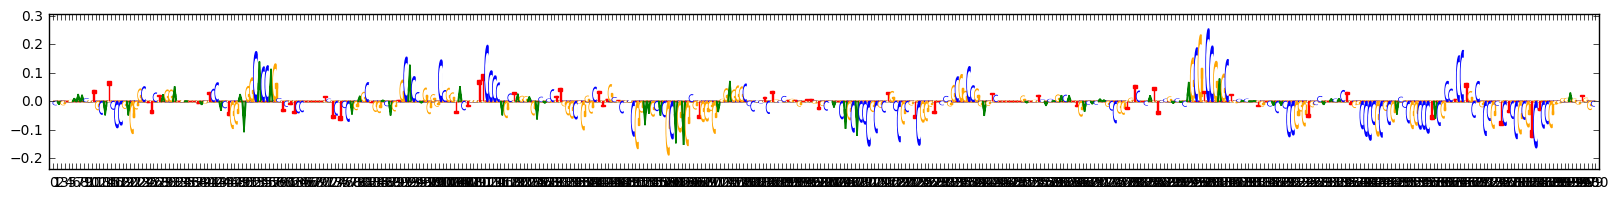

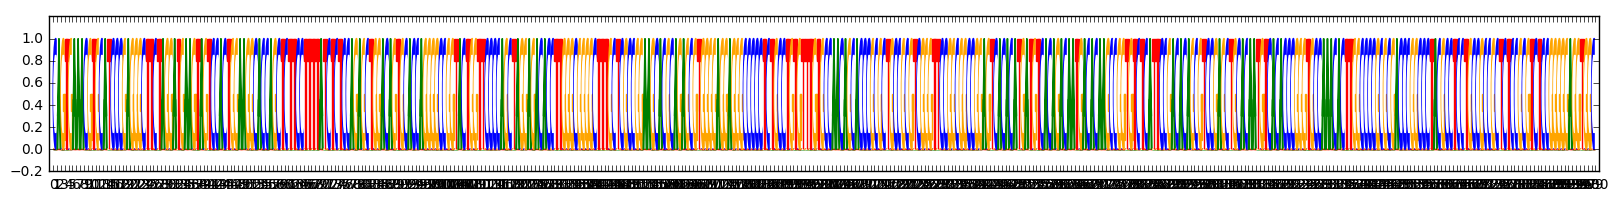

In [6]:
import modisco.visualization
from modisco.visualization import viz_sequence

viz_sequence.plot_weights(scores[0])
viz_sequence.plot_weights(onehot_data[0])

In [7]:
import h5py
import numpy as np
%matplotlib inline
import modisco
reload(modisco)
import modisco.backend
reload(modisco.backend.theano_backend)
reload(modisco.backend)
import modisco.nearest_neighbors
reload(modisco.nearest_neighbors)
import modisco.affinitymat
reload(modisco.affinitymat.core)
reload(modisco.affinitymat.transformers)
import modisco.tfmodisco_workflow.seqlets_to_patterns
reload(modisco.tfmodisco_workflow.seqlets_to_patterns)
import modisco.tfmodisco_workflow.workflow
reload(modisco.tfmodisco_workflow.workflow)
import modisco.aggregator
reload(modisco.aggregator)
import modisco.cluster
reload(modisco.cluster.core)
reload(modisco.cluster.phenograph.core)
reload(modisco.cluster.phenograph.cluster)
import modisco.core
reload(modisco.core)
import modisco.coordproducers
reload(modisco.coordproducers)
import modisco.metaclusterers
reload(modisco.metaclusterers)

tfmodisco_results = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow()(
                task_names=["task0"],
                contrib_scores={'task0': scores},
                hypothetical_contribs={'task0': scores},
                one_hot=onehot_data)

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN not available)


ImportError: cannot import name phenograph

In [9]:
import h5py
import modisco.util
reload(modisco.util)
!rm task0_results.hdf5
grp = h5py.File("task0_results.hdf5")
tfmodisco_results.save_hdf5(grp)

4
pattern_0
('total seqlets:', 289)
fwd:


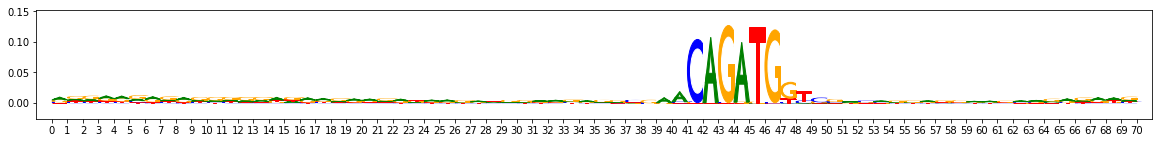

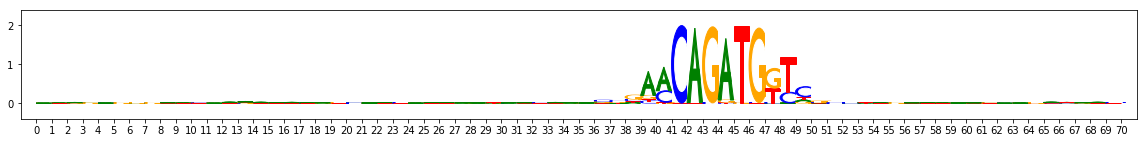

reverse:


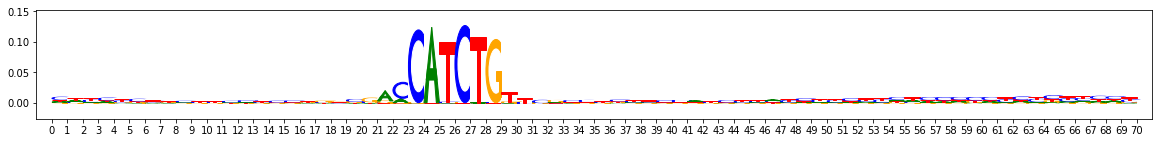

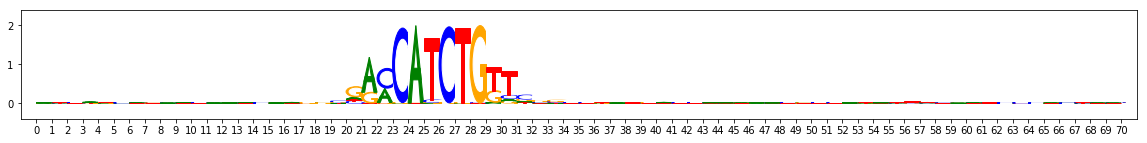

pattern_1
('total seqlets:', 79)
fwd:


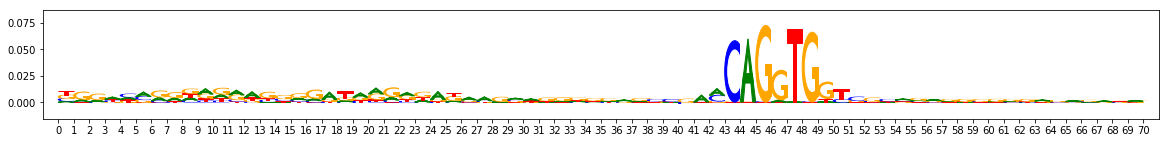

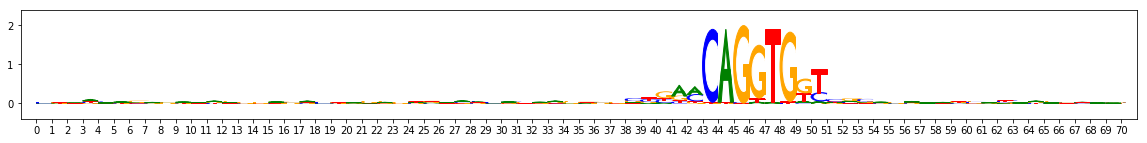

reverse:


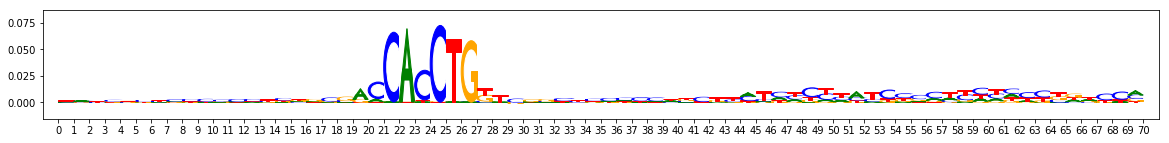

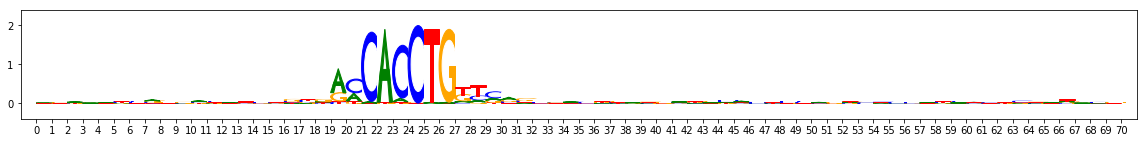

pattern_2
('total seqlets:', 76)
fwd:


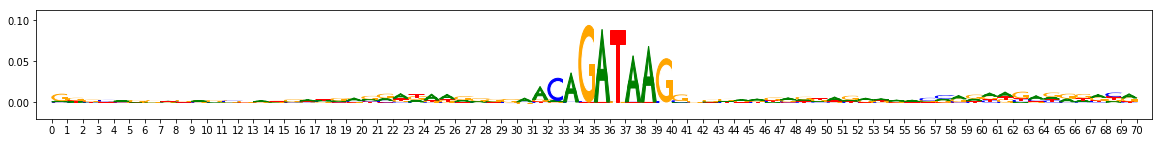

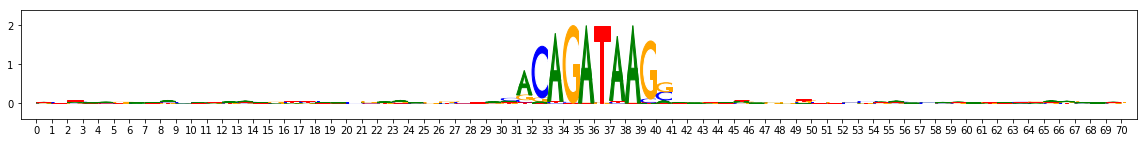

reverse:


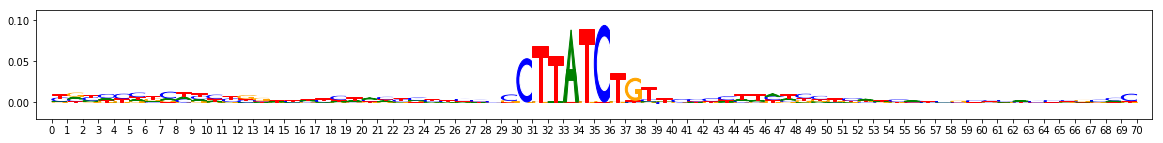

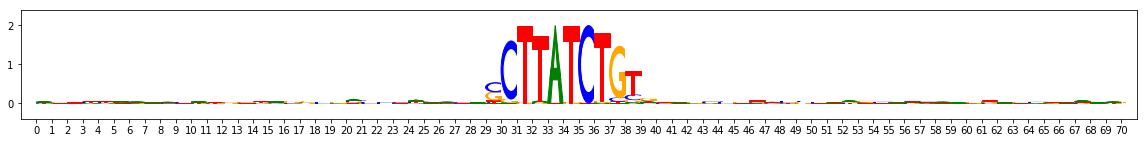

pattern_3
('total seqlets:', 62)
fwd:


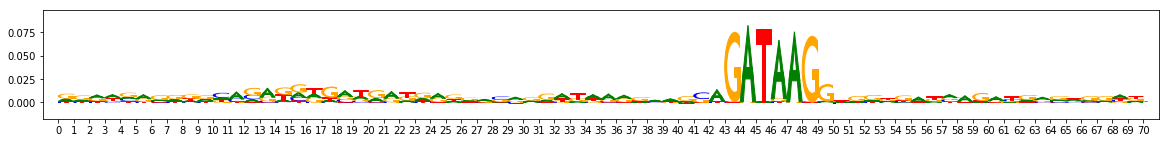

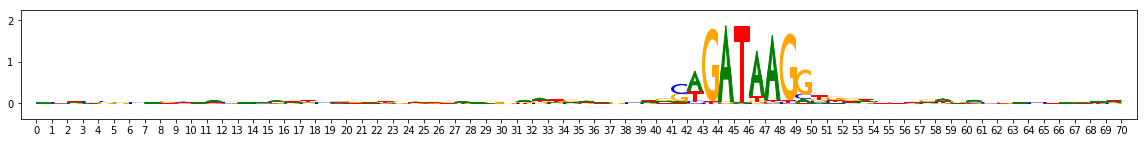

reverse:


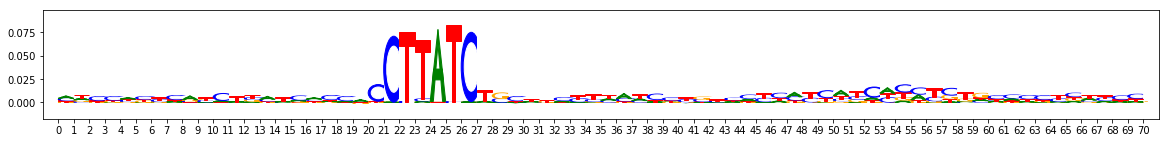

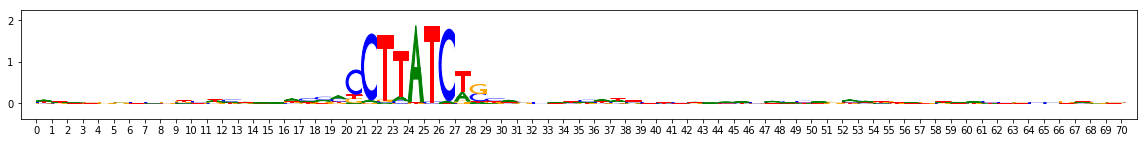

In [10]:
from collections import Counter
from modisco.visualization import viz_sequence
reload(viz_sequence)
from matplotlib import pyplot as plt

import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.aggregator
reload(modisco.aggregator)

import sklearn.decomposition
import sklearn.manifold

hdf5_results = h5py.File("task0_results.hdf5")

#patterns = (tfmodisco_results
#            .metacluster_idx_to_submetacluster_results[0]
#            .seqlets_to_patterns_result.patterns);
patterns = (list(hdf5_results
                 ["metacluster_idx_to_submetacluster_results"]
                 ["metacluster0"]
                 ["seqlets_to_patterns_result"]
                 ["patterns"]["all_pattern_names"]))
print(len(patterns))
pattern_grp = (hdf5_results
                 ["metacluster_idx_to_submetacluster_results"]
                 ["metacluster0"]
                 ["seqlets_to_patterns_result"]
                 ["patterns"])

for pattern_name in patterns:
    pattern = pattern_grp[pattern_name]
    print(pattern_name)
    print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
    #pattern.plot_counts(counts=aggregated_seqlet.get_per_position_seqlet_center_counts())
    background = np.array([0.27, 0.23, 0.23, 0.27])
    print("fwd:")
    viz_sequence.plot_weights(pattern["task0_contrib_scores"]["fwd"])
    viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]),
                                                    background=background))

    print("reverse:")
    viz_sequence.plot_weights(pattern["task0_contrib_scores"]["rev"])
    viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]),
                                                    background=background))